# Predicting Student Retention Using Machine Learning
  
**Supervised by:** Prof. Dr. Ahmed Yousry  
                  Eng. Walaa Khaled

---

## Project Description
This project aims to predict whether a student will return for the second academic year based on academic, demographic, and financial features. Machine learning models, including Logistic Regression and SVM, are applied to analyze and identify the most influential factors affecting student retention.

--------------
# 📊 Student Retention Dataset – Data Description

## 🎯 Project Objective
The objective of this project is to analyze student academic, demographic, and financial data in order to understand the key factors affecting student retention and predict whether a student will return for the second year.

Each row in the dataset represents a single student.

The target variable is:
**`RETURNED_2ND_YR`**  
- 1 → Student returned for the second year  
- 0 → Student did not return  

---

# 📌 Feature Categories

## 1️⃣ Demographic Features
These features describe the student’s personal and background information.

- `STDNT_AGE` → Student age  
- `STDNT_GENDER` → Student gender  
- `STDNT_BACKGROUND` → Student background category  
- `IN_STATE_FLAG` → Whether the student is in-state  
- `INTERNATIONAL_STS` → International student status  
- `DISTANCE_FROM_HOME` → Distance between home and university  
- `HOUSING_STS` → Housing status  

---

## 2️⃣ Academic Background
These features describe pre-university academic performance and academic choices.

- `HIGH_SCHL_GPA` → High school GPA  
- `HIGH_SCHL_NAME` → High school name  
- `STDNT_MAJOR` → Major field of study  
- `STDNT_MINOR` → Minor field of study  
- `STDNT_TEST_ENTRANCE1` → Entrance exam score 1  
- `STDNT_TEST_ENTRANCE2` → Entrance exam score 2  
- `STDNT_TEST_ENTRANCE_COMB` → Combined entrance score  

---

## 3️⃣ First Term Academic Performance
These features represent student performance during the first term.

- `FIRST_TERM_ATTEMPT_HRS` → Credit hours attempted  
- `FIRST_TERM_EARNED_HRS` → Credit hours earned  
- `CORE_COURSE_NAME_X_F` → First term course name  
- `CORE_COURSE_GRADE_X_F` → First term course grade  

---

## 4️⃣ Second Term Academic Performance
These features represent student performance during the second term.

- `SECOND_TERM_ATTEMPT_HRS` → Credit hours attempted  
- `SECOND_TERM_EARNED_HRS` → Credit hours earned  
- `CORE_COURSE_NAME_X_S` → Second term course name  
- `CORE_COURSE_GRADE_X_S` → Second term course grade  

---

## 5️⃣ Financial Features
These features describe the student’s financial situation.

- `GROSS_FIN_NEED` → Gross financial need  
- `COST_OF_ATTEND` → Cost of attendance  
- `EST_FAM_CONTRIBUTION` → Estimated family contribution  
- `UNMET_NEED` → Unmet financial need  

---

# 🔎 Key Analytical Questions

- Does high school GPA affect second-year retention?
- Does financial need influence student dropout?
- Is the gap between attempted and earned credit hours an important indicator?
- Do international students have different retention patterns?
- Does housing status impact student continuation?

---

# 💡 Business Problem Statement

The university aims to identify students at risk of not returning for the second year in order to provide early academic and financial support interventions.

------------------


In [90]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import f_classif, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [91]:
df = pd.read_excel("Student.xlsx", sheet_name="University information")


# EDA

In [92]:
# showing first 10 rows
df.head(10)

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0
5,7815697,18,M,BGD 1,Y,N,Political Science,N,NaN,1050.0,...,B,Bachelors,15,15,16.0,16.0,0,0,0,0.0
6,7838856,18,F,BGD 1,Y,N,Biology,N,NaN,580.0,...,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
7,7960448,18,F,BGD 1,Y,N,Biology,N,NaN,750.0,...,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
8,7944779,18,F,BGD 3,Y,N,Accounting,N,NaN,1060.0,...,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
9,7902044,18,F,BGD 1,Y,N,Undeclared,N,NaN,NaN,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0


In [93]:
# showing last 10 rows
df.tail(10)

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
3390,7996917,18,F,BGD 4,N,N,Biology,N,21.0,NaN,...,B,Bachelors,13,7,NaN,NaN,0,0,0,0.0
3391,7871531,18,F,BGD 1,N,N,Pre-Business,N,21.0,NaN,...,B,Bachelors,17,6,NaN,NaN,0,0,0,0.0
3392,7807989,19,M,BGD 1,N,N,Undeclared,N,NaN,1070.0,...,B,Bachelors,15,3,NaN,NaN,0,0,467520,0.0
3393,7774220,18,F,BGD 4,Y,N,Pre-Nursing,N,NaN,1400.0,...,B,Bachelors,13,0,NaN,NaN,0,1417380,1505400,-289140.0
3394,7960053,18,F,BGD 1,Y,N,Theatre Arts,N,NaN,1010.0,...,B,Bachelors,13,3,NaN,NaN,0,0,0,0.0
3395,7948112,18,F,BGD 4,N,N,Music Performance,N,NaN,800.0,...,B,Bachelors,18,18,16.0,13.0,0,0,0,0.0
3396,8023055,18,F,BGD 1,Y,N,Biology,N,20.0,NaN,...,B,Bachelors,13,9,NaN,NaN,0,0,0,0.0
3397,7926915,18,F,BGD 4,Y,N,Biology,N,NaN,1020.0,...,B,Bachelors,14,6,NaN,NaN,0,945840,1288980,0.0
3398,7877332,18,F,BGD 3,Y,N,Joint Enrollment - Accel,N,21.0,NaN,...,B,Bachelors,12,9,NaN,NaN,0,269100,0,-231720.0
3399,7928405,18,M,BGD 2,Y,N,Art,Creative Writing,NaN,890.0,...,B,Bachelors,12,9,13.0,6.0,0,0,0,0.0


In [94]:
# showing the data shape
df.shape

(3400, 56)

In [95]:
# columns names
col_names = df.columns
col_names

Index(['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
       'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F',
       'CORE_COURSE_GRADE_6_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S',
       'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S',
       'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S',
       'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'RETURNED_2ND_YR',
       'DISTANCE_FROM_

In [96]:
# iformation about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [97]:
# Checking for Nulls values
df.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [98]:
# Detailed information about null values
info_df = pd.DataFrame({
    "Data Type": df.dtypes,
    "Non-Null Count": df.notnull().sum(),
    "Null Count": df.isnull().sum(),
    "Null %": (df.isnull().sum() / len(df) * 100).round(2)
})

info_df.sort_values(by="Null %", ascending=False)

,Data Type,Non-Null Count,Null Count,Null %
CORE_COURSE_GRADE_6_S,object,81,3319,97.62
CORE_COURSE_NAME_6_S,object,81,3319,97.62
CORE_COURSE_NAME_6_F,object,128,3272,96.24
CORE_COURSE_GRADE_6_F,object,128,3272,96.24
CORE_COURSE_GRADE_5_S,object,450,2950,86.76
CORE_COURSE_NAME_5_S,object,450,2950,86.76
CORE_COURSE_GRADE_5_F,object,645,2755,81.03
CORE_COURSE_NAME_5_F,object,645,2755,81.03
STDNT_TEST_ENTRANCE1,float64,1106,2294,67.47
CORE_COURSE_NAME_4_S,object,1355,2045,60.15


### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.


First of all, I will find categorical variables.

In [99]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']  #Object

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 36 categorical variables

The categorical variables are : ['STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR', 'CORE_COURSE_NAME_1_F', 'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F', 'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F', 'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F', 'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F', 'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F', 'CORE_COURSE_GRADE_6_F', 'CORE_COURSE_NAME_1_S', 'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S', 'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S', 'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S', 'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S', 'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S', 'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'HIGH_SCHL_NAME', 'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_CD', 'DEGREE_GROUP_DESC']


In [100]:
# view the categorical variables

df[categorical].head()

,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,...,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,HIGH_SCHL_NAME,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC
0,F,BGD 1,Y,N,Undeclared,N,ANTH 1105,A,ARTH 1100,A,...,NaN,NaN,NaN,NaN,On Campus,SCHOOL 50,No Information,No Information,B,Bachelors
1,F,BGD 1,N,N,Undeclared,N,ANTH 1105,A,GERM 1002,A,...,NaN,NaN,NaN,NaN,Off Campus,SCHOOL 389,College/Beyond,College/Beyond,B,Bachelors
2,M,BGD 1,Y,N,Mathematics,N,ANTH 1105,A,ENGL 1101,A,...,NaN,NaN,NaN,NaN,On Campus,SCHOOL 82,High School,Other/Unknown,B,Bachelors
3,M,BGD 1,Y,N,Undeclared,N,ANTH 1107,A,COMM 1110,A,...,NaN,NaN,NaN,NaN,On Campus,SCHOOL 180,College/Beyond,College/Beyond,B,Bachelors
4,F,BGD 1,Y,N,Art,N,ANTH 1107,A,ARTH 1100,A,...,NaN,NaN,NaN,NaN,Off Campus,SCHOOL 2,College/Beyond,High School,B,Bachelors


## Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [101]:
# Detailed information about Categorical null values
Categorical_info_df = pd.DataFrame({
    "Non-Null Count": df[categorical].notnull().sum(),
    "Null Count": df[categorical].isnull().sum(),
    "Null %": (df[categorical].isnull().sum() / len(df) * 100).round(2)
})
Categorical_info_df.sort_values(by="Null %", ascending=False)

,Non-Null Count,Null Count,Null %
CORE_COURSE_NAME_6_S,81,3319,97.62
CORE_COURSE_GRADE_6_S,81,3319,97.62
CORE_COURSE_GRADE_6_F,128,3272,96.24
CORE_COURSE_NAME_6_F,128,3272,96.24
CORE_COURSE_NAME_5_S,450,2950,86.76
CORE_COURSE_GRADE_5_S,450,2950,86.76
CORE_COURSE_GRADE_5_F,645,2755,81.03
CORE_COURSE_NAME_5_F,645,2755,81.03
CORE_COURSE_GRADE_4_S,1355,2045,60.15
CORE_COURSE_NAME_4_S,1355,2045,60.15


In [102]:
for var in categorical:
    print(df[var].value_counts())



STDNT_GENDER
F    2140
M    1260
Name: count, dtype: int64
STDNT_BACKGROUND
BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: count, dtype: int64
IN_STATE_FLAG
Y    3063
N     337
Name: count, dtype: int64
INTERNATIONAL_STS
N    3373
Y      27
Name: count, dtype: int64
STDNT_MAJOR
Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Political Science                  64
Chem

In [103]:
# view frequency distribution of categorical variables

for var in categorical:

    print(df[var].value_counts()/float(len(df)))

STDNT_GENDER
F    0.629412
M    0.370588
Name: count, dtype: float64
STDNT_BACKGROUND
BGD 1    0.612353
BGD 3    0.278529
BGD 4    0.040882
BGD 2    0.031176
BGD 6    0.027647
BGD 7    0.005588
BGD 5    0.002353
BGD 8    0.001471
Name: count, dtype: float64
IN_STATE_FLAG
Y    0.900882
N    0.099118
Name: count, dtype: float64
INTERNATIONAL_STS
N    0.992059
Y    0.007941
Name: count, dtype: float64
STDNT_MAJOR
Undeclared                        0.135294
Biology                           0.106471
Early Childhood Education         0.055882
Pre-Nursing                       0.052059
Nursing                           0.048235
Psychology                        0.045588
Pre-Business                      0.039118
Theatre Arts                      0.038529
Music Performance                 0.029118
Criminal Justice                  0.028824
Music Education                   0.028235
General Business                  0.025000
Exercise Science                  0.023824
Art                        

In [104]:
# Explore unique labels in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

STDNT_GENDER  contains  2  labels
STDNT_BACKGROUND  contains  8  labels
IN_STATE_FLAG  contains  2  labels
INTERNATIONAL_STS  contains  2  labels
STDNT_MAJOR  contains  54  labels
STDNT_MINOR  contains  37  labels
CORE_COURSE_NAME_1_F  contains  69  labels
CORE_COURSE_GRADE_1_F  contains  7  labels
CORE_COURSE_NAME_2_F  contains  75  labels
CORE_COURSE_GRADE_2_F  contains  8  labels
CORE_COURSE_NAME_3_F  contains  75  labels
CORE_COURSE_GRADE_3_F  contains  7  labels
CORE_COURSE_NAME_4_F  contains  69  labels
CORE_COURSE_GRADE_4_F  contains  7  labels
CORE_COURSE_NAME_5_F  contains  54  labels
CORE_COURSE_GRADE_5_F  contains  5  labels
CORE_COURSE_NAME_6_F  contains  25  labels
CORE_COURSE_GRADE_6_F  contains  5  labels
CORE_COURSE_NAME_1_S  contains  67  labels
CORE_COURSE_GRADE_1_S  contains  9  labels
CORE_COURSE_NAME_2_S  contains  70  labels
CORE_COURSE_GRADE_2_S  contains  7  labels
CORE_COURSE_NAME_3_S  contains  69  labels
CORE_COURSE_GRADE_3_S  contains  7  labels
CORE_COURSE_

### Feature Engineering of Categories Date Variable

In [105]:
# drop the categories Date that we don't need or affect on model 
cols_to_drop= ['CORE_COURSE_NAME_1_F', 'CORE_COURSE_NAME_2_F',
               'CORE_COURSE_NAME_3_F', 'CORE_COURSE_NAME_4_F',
               'CORE_COURSE_NAME_5_F', 'CORE_COURSE_NAME_6_F', 
               'CORE_COURSE_NAME_1_S', 'CORE_COURSE_NAME_2_S', 
               'CORE_COURSE_NAME_3_S', 'CORE_COURSE_NAME_4_S', 
               'CORE_COURSE_NAME_5_S', 'CORE_COURSE_NAME_6_S',
               'HIGH_SCHL_NAME']

In [106]:
# drop the unwanted columns
df.drop(columns=cols_to_drop, inplace=True)

In [107]:
df.shape


(3400, 43)

In [108]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']  #Object

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 23 categorical variables

The categorical variables are : ['STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR', 'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_GRADE_6_F', 'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_CD', 'DEGREE_GROUP_DESC']


In [109]:
# Explore unique labels in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

STDNT_GENDER  contains  2  labels
STDNT_BACKGROUND  contains  8  labels
IN_STATE_FLAG  contains  2  labels
INTERNATIONAL_STS  contains  2  labels
STDNT_MAJOR  contains  54  labels
STDNT_MINOR  contains  37  labels
CORE_COURSE_GRADE_1_F  contains  7  labels
CORE_COURSE_GRADE_2_F  contains  8  labels
CORE_COURSE_GRADE_3_F  contains  7  labels
CORE_COURSE_GRADE_4_F  contains  7  labels
CORE_COURSE_GRADE_5_F  contains  5  labels
CORE_COURSE_GRADE_6_F  contains  5  labels
CORE_COURSE_GRADE_1_S  contains  9  labels
CORE_COURSE_GRADE_2_S  contains  7  labels
CORE_COURSE_GRADE_3_S  contains  7  labels
CORE_COURSE_GRADE_4_S  contains  6  labels
CORE_COURSE_GRADE_5_S  contains  6  labels
CORE_COURSE_GRADE_6_S  contains  4  labels
HOUSING_STS  contains  2  labels
FATHER_HI_EDU_DESC  contains  5  labels
MOTHER_HI_EDU_DESC  contains  5  labels
DEGREE_GROUP_CD  contains  3  labels
DEGREE_GROUP_DESC  contains  3  labels


### Explore Categorical Variables


Now, I will explore the categorical variables one by one.

#### Explore STDNT_GENDER Variables

In [110]:
# print number of labels in STDNT_GENDER variable

print('STDNT_GENDER contains', len(df.STDNT_GENDER.unique()), 'labels')


STDNT_GENDER contains 2 labels


In [111]:
# check labels in STDNT_GENDER variable

df.STDNT_GENDER.unique()

array(['F', 'M'], dtype=object)

In [112]:
# check frequency distribution of values in STDNT_GENDER variable

df.STDNT_GENDER.value_counts()

STDNT_GENDER
F    2140
M    1260
Name: count, dtype: int64

In [113]:
# changing STDNT_GENDER data to numerical data

# df['STDNT_GENDER'] = df['STDNT_GENDER'].map({'M': 1, 'F': 0})
# df['STDNT_GENDER'].dtype

In [114]:
# check number of null values in STDNT_GENDER variable
df.STDNT_GENDER.isnull().sum()

np.int64(0)

#### Explore STDNT_BACKGROUND Variables




In [115]:
# print number of labels in STDNT_BACKGROUND variable

print('STDNT_BACKGROUND contains', len(df.STDNT_BACKGROUND.unique()), 'labels')


STDNT_BACKGROUND contains 8 labels


In [116]:
# check labels in STDNT_GENDER variable

df.STDNT_BACKGROUND.unique()

array(['BGD 1', 'BGD 3', 'BGD 6', 'BGD 4', 'BGD 8', 'BGD 2', 'BGD 7',
       'BGD 5'], dtype=object)

In [117]:
# check frequency distribution of values in STDNT_GENDER variable

df.STDNT_BACKGROUND.value_counts()


STDNT_BACKGROUND
BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: count, dtype: int64

#### Explore IN_STATE_FLAG Variables




In [118]:
# print number of labels in IN_STATE_FLAG variable

print('IN_STATE_FLAG contains', len(df.IN_STATE_FLAG.unique()), 'labels')

IN_STATE_FLAG contains 2 labels


In [119]:
# check labels in IN_STATE_FLAG variable

df.IN_STATE_FLAG.unique()

array(['Y', 'N'], dtype=object)

In [120]:
# check frequency distribution of values in IN_STATE_FLAG variable

df.IN_STATE_FLAG.value_counts()


IN_STATE_FLAG
Y    3063
N     337
Name: count, dtype: int64

In [121]:
# check number of null values in IN_STATE_FLAG variable
df.IN_STATE_FLAG.isnull().sum()


np.int64(0)

In [122]:
# changing IN_STATE_FLAG data to numerical data

# df['IN_STATE_FLAG'] = df['IN_STATE_FLAG'].map({'Y': 1, 'N': 0})
# df['IN_STATE_FLAG'].dtype

#### Explore INTERNATIONAL_STS Variables




In [123]:
# print number of labels in INTERNATIONAL_STS variable

print('INTERNATIONAL_STS contains', len(df.INTERNATIONAL_STS.unique()), 'labels')

INTERNATIONAL_STS contains 2 labels


In [124]:
# check labels in INTERNATIONAL_STS variable

df.INTERNATIONAL_STS.unique()

array(['N', 'Y'], dtype=object)

In [125]:
# check frequency distribution of values in IN_STATE_FLAG variable

df.INTERNATIONAL_STS.value_counts()


INTERNATIONAL_STS
N    3373
Y      27
Name: count, dtype: int64

In [126]:
# check number of null values in INTERNATIONAL_STS variable
df.INTERNATIONAL_STS.isnull().sum()


np.int64(0)

In [127]:
# changing IN_STATE_FLAG data to numerical data

# df['INTERNATIONAL_STS'] = df['INTERNATIONAL_STS'].map({'Y': 1, 'N': 0})
# df['INTERNATIONAL_STS'].dtype

#### Explore STDNT_MAJOR Variables




In [128]:
# print number of labels in STDNT_MAJOR variable

print('STDNT_MAJOR contains', len(df.STDNT_MAJOR.unique()), 'labels')

STDNT_MAJOR contains 54 labels


In [129]:
# check labels in STDNT_MAJOR variable

df.STDNT_MAJOR.unique()

array(['Undeclared', 'Mathematics', 'Art', 'Political Science', 'Biology',
       'Accounting', 'Criminal Justice', 'Psychology', 'Theatre Arts',
       'Nursing', 'Pre-Nursing', 'Chemistry', 'Pre-Engineering/RETP',
       'Early Childhood Education', 'Music Performance',
       'English Language/Literature', 'Joint Enrollment - Accel',
       'History and Secondary Ed', 'History', 'Engineering Studies',
       'Computer Science - Systems', 'Pre-Business', 'Management',
       'Theatre Education', 'Marketing', 'Communication',
       'Music Education', 'French with Teacher Cert',
       'English and Secondary Ed', 'Exercise Science', 'General Business',
       'Mathematics and Secondary Ed', 'Finance', 'French',
       'Health Science', 'Spec Ed: Gen. Curr. - Reading', 'Music',
       'Middle Grades Education', 'Geology',
       'Management Information Systems', 'Art Education',
       'Applied Computer Science', 'Information Technology', 'Sociology',
       'Computer Science - Games',

In [130]:
# check frequency distribution of values in STDNT_MAJOR variable

df.STDNT_MAJOR.value_counts()

STDNT_MAJOR
Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Political Science                  64
Chemistry                          64
English Language/Literature        60
Engineering Studies                60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35


In [131]:
# check number of null values in STDNT_MAJOR variable
df.STDNT_MAJOR.isnull().sum()

np.int64(0)

#### Explore STDNT_MINOR Variables




In [132]:
# print number of labels in STDNT_MINOR variable

print('STDNT_MINOR contains', len(df.STDNT_MINOR.unique()), 'labels')

STDNT_MINOR contains 37 labels


In [133]:
# check labels in STDNT_MINOR variable

df.STDNT_MINOR.unique()

array(['N', 'Theatre Arts', 'Foundations of Business', 'Spanish',
       'Professional Writing', 'Computer Science - Systems', 'Art',
       'Mathematics', 'Chemistry', 'Psychology', "Women's Studies",
       'Creative Writing', 'Biology', 'History',
       'Early Childhood Education', 'Health Science', 'Accounting',
       'Political Science', 'Communication', 'Asian Studies',
       'Criminal Justice', 'English Language/Literature', 'Art History',
       'Marketing', 'French', 'Economics', 'Sociology',
       'International Business', 'Music', 'Exercise Science', 'Finance',
       'Computer Info. Management', 'Military Sci & Adv Leadership',
       'African Studies', 'Management', 'Anthropology', 'Philosophy'],
      dtype=object)

In [134]:
# check frequency distribution of values in STDNT_MINOR variable

df.STDNT_MINOR.value_counts()


STDNT_MINOR
N                                3160
Spanish                            26
Psychology                         19
Music                              19
Foundations of Business            15
Communication                      14
History                            13
Theatre Arts                       12
Criminal Justice                   12
Computer Science - Systems         10
Early Childhood Education           9
Mathematics                         7
Professional Writing                6
Marketing                           6
Art History                         6
Art                                 5
Sociology                           5
English Language/Literature         5
Political Science                   4
Chemistry                           4
Accounting                          4
Biology                             4
French                              4
Computer Info. Management           3
Exercise Science                    3
International Business              3


In [135]:
# check number of null values in STDNT_MINOR variable
df.STDNT_MINOR.isnull().sum()


np.int64(0)

In [136]:
# make them only yes or no due to the large number of labels with  small frequencies
df['STDNT_MINOR'] = df['STDNT_MINOR'].apply(lambda x: 'YES' if x != 'N' else 'NO')

In [137]:
# check frequency distribution of values in STDNT_MINOR variable

df.STDNT_MINOR.value_counts()


STDNT_MINOR
NO     3160
YES     240
Name: count, dtype: int64

#### Explore STDNT_MAJOR Variables




In [138]:
# print number of labels in STDNT_MAJOR variable

print('STDNT_MAJOR contains', len(df.STDNT_MAJOR.unique()), 'labels')

STDNT_MAJOR contains 54 labels


In [139]:
# check labels in STDNT_MAJOR variable

df.STDNT_MAJOR.unique()

array(['Undeclared', 'Mathematics', 'Art', 'Political Science', 'Biology',
       'Accounting', 'Criminal Justice', 'Psychology', 'Theatre Arts',
       'Nursing', 'Pre-Nursing', 'Chemistry', 'Pre-Engineering/RETP',
       'Early Childhood Education', 'Music Performance',
       'English Language/Literature', 'Joint Enrollment - Accel',
       'History and Secondary Ed', 'History', 'Engineering Studies',
       'Computer Science - Systems', 'Pre-Business', 'Management',
       'Theatre Education', 'Marketing', 'Communication',
       'Music Education', 'French with Teacher Cert',
       'English and Secondary Ed', 'Exercise Science', 'General Business',
       'Mathematics and Secondary Ed', 'Finance', 'French',
       'Health Science', 'Spec Ed: Gen. Curr. - Reading', 'Music',
       'Middle Grades Education', 'Geology',
       'Management Information Systems', 'Art Education',
       'Applied Computer Science', 'Information Technology', 'Sociology',
       'Computer Science - Games',

In [140]:
# check frequency distribution of values in STDNT_MAJOR variable

df.STDNT_MAJOR.value_counts()

STDNT_MAJOR
Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Political Science                  64
Chemistry                          64
English Language/Literature        60
Engineering Studies                60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35


In [141]:
# check number of null values in STDNT_MAJOR variable
df.STDNT_MAJOR.isnull().sum()

np.int64(0)

In [142]:
# get top 8 majors
top_8 = df['STDNT_MAJOR'].value_counts().nlargest(8).index

# replace others
df['STDNT_MAJOR'] = df['STDNT_MAJOR'].where(
    df['STDNT_MAJOR'].isin(top_8),
    'Others'
)

# check result
df['STDNT_MAJOR'].value_counts()

STDNT_MAJOR
Others                       1628
Undeclared                    460
Biology                       362
Early Childhood Education     190
Pre-Nursing                   177
Nursing                       164
Psychology                    155
Pre-Business                  133
Theatre Arts                  131
Name: count, dtype: int64

#### Explore CORE_COURSE_GRADE_1_F Variables




In [143]:
# print number of labels in CORE_COURSE_GRADE_1_F variable

print('CORE_COURSE_GRADE_1_F contains', len(df.CORE_COURSE_GRADE_1_F.unique()), 'labels')

CORE_COURSE_GRADE_1_F contains 7 labels


In [144]:
# check labels in CORE_COURSE_GRADE_1_F variable

df.CORE_COURSE_GRADE_1_F.unique()

array(['A', 'B', 'C', 'NOT REP', 'D', 'F', 'INCOMPL'], dtype=object)

In [145]:
# check frequency distribution of values in CORE_COURSE_GRADE_1_F variable

df.CORE_COURSE_GRADE_1_F.value_counts()

CORE_COURSE_GRADE_1_F
C          1024
B           941
D           538
F           440
A           322
NOT REP     106
INCOMPL      29
Name: count, dtype: int64

In [146]:
# check number of null values in CORE_COURSE_GRADE_1_F variable
df.CORE_COURSE_GRADE_1_F.isnull().sum()

np.int64(0)

#### Explore Manage CORE_COURSE_GRADEs Variables




In [147]:
# Define all core course grade columns (Fall and Spring semesters, courses 1-6)
grade_cols = [
    'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_GRADE_2_F',
    'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_GRADE_4_F',
    'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_GRADE_6_F',
    'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_GRADE_2_S',
    'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_GRADE_4_S',
    'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_GRADE_6_S'
]

# Create a mapping dictionary to convert letter grades to GPA scale (4.0 system)
grade_map = {
    'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D': 1.0,
    'F': 0.0
}

# Replace letter grades with their numerical GPA equivalents
df[grade_cols] = df[grade_cols].replace(grade_map)

# Note: This line is duplicated in the original code (redundant replacement)
df[grade_cols] = df[grade_cols].replace(grade_map)

# Convert all grade columns to numeric, forcing any non-convertible values to NaN
df[grade_cols] = df[grade_cols].apply(pd.to_numeric, errors='coerce')

# Calculate the Cumulative GPA (CGPA) as the mean of all course grades for each student
# axis=1 computes the mean across columns (row-wise)
df['CGPA'] = df[grade_cols].mean(axis=1)

# Fill any missing CGPA values with 0 (students with no grade data)
df['CGPA'] = df['CGPA'].fillna(0)

# Drop individual grade columns since they've been consolidated into CGPA
df.drop(columns=grade_cols, inplace=True)

/var/folders/b1/pp17fpp91zz9m_r7bqr47r940000gn/T/ipykernel_67718/124519022.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[grade_cols] = df[grade_cols].replace(grade_map)


In [148]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']  #Object

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 11 categorical variables

The categorical variables are : ['STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR', 'HOUSING_STS', 'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_CD', 'DEGREE_GROUP_DESC']


#### Explore & Manage DESC Variables




In [149]:
# print number of labels in FATHER_HI_EDU_DESC variable

print('FATHER_HI_EDU_DESC contains', len(df.FATHER_HI_EDU_DESC.unique()), 'labels')

FATHER_HI_EDU_DESC contains 5 labels


In [150]:
# check labels in FATHER_HI_EDU_DESC variable

df.FATHER_HI_EDU_DESC.unique()

array(['No Information', 'College/Beyond', 'High School',
       'Middle School/Junior High', 'Other/Unknown'], dtype=object)

In [151]:
# check frequency distribution of values in FATHER_HI_EDU_DESC variable

df.FATHER_HI_EDU_DESC.value_counts()

FATHER_HI_EDU_DESC
High School                  1336
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: count, dtype: int64

In [152]:
# check number of null values in FATHER_HI_EDU_DESC variable
df.FATHER_HI_EDU_DESC.isnull().sum()

np.int64(0)

In [153]:
# Drop columns that have others with the same data like DESC Data
df.drop(columns=['FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_DESC'], inplace=True)

In [154]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']  #Object

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 8 categorical variables

The categorical variables are : ['STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR', 'HOUSING_STS', 'DEGREE_GROUP_CD']


### Explore Numerical Variables

In [155]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype !='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 21 numerical variables

The numerical variables are : ['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2', 'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'SECOND_TERM', 'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'FATHER_HI_EDU_CD', 'MOTHER_HI_EDU_CD', 'FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS', 'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS', 'GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION', 'UNMET_NEED', 'CGPA']


In [156]:
# Detailed information about numerical null values
Numerical_info_df = pd.DataFrame({
    "Non-Null Count": df[numerical].notnull().sum(),
    "Null Count": df[numerical].isnull().sum(),
    "Null %": (df[numerical ].isnull().sum() / len(df) * 100).round(2)
})
Numerical_info_df.sort_values(by="Null %", ascending=False)

,Non-Null Count,Null Count,Null %
STDNT_TEST_ENTRANCE1,1106,2294,67.47
STDNT_TEST_ENTRANCE2,2492,908,26.71
STDNT_TEST_ENTRANCE_COMB,2882,518,15.24
MOTHER_HI_EDU_CD,2911,489,14.38
FATHER_HI_EDU_CD,2968,432,12.71
SECOND_TERM_EARNED_HRS,3191,209,6.15
SECOND_TERM_ATTEMPT_HRS,3194,206,6.06
HIGH_SCHL_GPA,3347,53,1.56
DISTANCE_FROM_HOME,3375,25,0.74
UNMET_NEED,3400,0,0.00


In [157]:
for var in numerical:
    print(df[var].value_counts())



STUDENT IDENTIFIER
7808615    1
7757599    1
8004405    1
7976167    1
7922012    1
          ..
7942502    1
7929161    1
7795042    1
7912701    1
7928405    1
Name: count, Length: 3400, dtype: int64
STDNT_AGE
18    2860
17     309
19     190
20      14
16       8
21       7
22       4
23       3
25       3
26       1
24       1
Name: count, dtype: int64
STDNT_TEST_ENTRANCE1
20.0    166
19.0    162
18.0    141
21.0    134
22.0    106
17.0     81
24.0     58
23.0     53
26.0     40
16.0     35
25.0     35
27.0     26
28.0     20
15.0     18
30.0      9
29.0      7
31.0      5
14.0      4
13.0      2
32.0      1
8.0       1
11.0      1
12.0      1
Name: count, dtype: int64
STDNT_TEST_ENTRANCE2
970.0     81
1010.0    80
1030.0    77
940.0     74
960.0     72
          ..
670.0      1
350.0      1
1440.0     1
1410.0     1
710.0      1
Name: count, Length: 109, dtype: int64
STDNT_TEST_ENTRANCE_COMB
950.0     382
990.0     352
910.0     309
1030.0    268
870.0     238
1070.0    234
1110.0

In [158]:
# view frequency distribution of categorical variables

for var in numerical:

    print(df[var].value_counts()/float(len(df)))

STUDENT IDENTIFIER
7808615    0.000294
7757599    0.000294
8004405    0.000294
7976167    0.000294
7922012    0.000294
             ...   
7942502    0.000294
7929161    0.000294
7795042    0.000294
7912701    0.000294
7928405    0.000294
Name: count, Length: 3400, dtype: float64
STDNT_AGE
18    0.841176
17    0.090882
19    0.055882
20    0.004118
16    0.002353
21    0.002059
22    0.001176
23    0.000882
25    0.000882
26    0.000294
24    0.000294
Name: count, dtype: float64
STDNT_TEST_ENTRANCE1
20.0    0.048824
19.0    0.047647
18.0    0.041471
21.0    0.039412
22.0    0.031176
17.0    0.023824
24.0    0.017059
23.0    0.015588
26.0    0.011765
16.0    0.010294
25.0    0.010294
27.0    0.007647
28.0    0.005882
15.0    0.005294
30.0    0.002647
29.0    0.002059
31.0    0.001471
14.0    0.001176
13.0    0.000588
32.0    0.000294
8.0     0.000294
11.0    0.000294
12.0    0.000294
Name: count, dtype: float64
STDNT_TEST_ENTRANCE2
970.0     0.023824
1010.0    0.023529
1030.0    0.02264

In [159]:
# Explore unique labels in numerical variables
for var in numerical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

STUDENT IDENTIFIER  contains  3400  labels
STDNT_AGE  contains  11  labels
STDNT_TEST_ENTRANCE1  contains  24  labels
STDNT_TEST_ENTRANCE2  contains  110  labels
STDNT_TEST_ENTRANCE_COMB  contains  25  labels
FIRST_TERM  contains  6  labels
SECOND_TERM  contains  6  labels
RETURNED_2ND_YR  contains  2  labels
DISTANCE_FROM_HOME  contains  72  labels
HIGH_SCHL_GPA  contains  201  labels
FATHER_HI_EDU_CD  contains  5  labels
MOTHER_HI_EDU_CD  contains  5  labels
FIRST_TERM_ATTEMPT_HRS  contains  12  labels
FIRST_TERM_EARNED_HRS  contains  22  labels
SECOND_TERM_ATTEMPT_HRS  contains  22  labels
SECOND_TERM_EARNED_HRS  contains  24  labels
GROSS_FIN_NEED  contains  927  labels
COST_OF_ATTEND  contains  120  labels
EST_FAM_CONTRIBUTION  contains  1236  labels
UNMET_NEED  contains  1197  labels
CGPA  contains  126  labels


In [160]:
df.head()


,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,CGPA
0,7808615,18,F,BGD 1,Y,N,Undeclared,NO,NaN,1150.0,...,B,16,16,14.0,14.0,0,0,0,0.0,4.0
1,7830063,19,F,BGD 1,N,N,Undeclared,NO,26.0,NaN,...,B,18,18,18.0,18.0,570000,1355760,785760,459300.0,4.0
2,7847538,18,M,BGD 1,Y,N,Others,NO,NaN,1020.0,...,B,15,15,14.0,14.0,0,0,0,0.0,4.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,NO,NaN,1210.0,...,B,13,13,14.0,14.0,0,0,0,0.0,4.0
4,7962680,18,F,BGD 1,Y,N,Others,NO,NaN,1200.0,...,B,12,12,12.0,12.0,835920,1355760,519840,278340.0,4.0


In [161]:
# drop the unwanted like  STUDENT IDENTIFIER columns
df.head()
df.drop(columns=['STUDENT IDENTIFIER'], inplace=True, axis=1)

In [162]:
df.shape


(3400, 28)

### Manage ENTRANCE_SCORE 

In [163]:
# Create a consolidated entrance score by combining available entrance test scores
# If STDNT_TEST_ENTRANCE_COMB exists, use it; otherwise, calculate mean of ENTRANCE1 and ENTRANCE2
df['ENTRANCE_SCORE_FINAL'] = df['STDNT_TEST_ENTRANCE_COMB'].fillna(df[['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2']].mean(axis=1))

# Define a function for context-aware random imputation
# This preserves the distribution of values within each group
def context_random_impute(series):
    # Create a boolean mask identifying missing values
    mask = series.isna()
    if mask.sum() > 0:  # If there are missing values
        # Get non-missing values from the series
        values = series.dropna().values
        if len(values) > 0:  # If there are non-missing values to sample from
            # Randomly sample from existing values to fill missing ones
            series[mask] = np.random.choice(values, size=mask.sum())
    return series

# Apply context-aware imputation within each DEGREE_GROUP_CD
# This fills missing entrance scores with random samples from students in the same degree program
# Helps maintain realistic score distributions for each program
df['ENTRANCE_SCORE_FINAL'] = df.groupby('DEGREE_GROUP_CD')['ENTRANCE_SCORE_FINAL'].transform(context_random_impute)

# Fill any remaining missing values with the overall median entrance score
# This handles cases where a degree group had all missing values
df['ENTRANCE_SCORE_FINAL'] = df['ENTRANCE_SCORE_FINAL'].fillna(df['ENTRANCE_SCORE_FINAL'].median())

# Drop the original entrance score columns since they've been consolidated
df.drop(columns=['STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2', 'STDNT_TEST_ENTRANCE_COMB'], inplace=True)

In [164]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype !='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 18 numerical variables

The numerical variables are : ['STDNT_AGE', 'FIRST_TERM', 'SECOND_TERM', 'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'FATHER_HI_EDU_CD', 'MOTHER_HI_EDU_CD', 'FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS', 'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS', 'GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION', 'UNMET_NEED', 'CGPA', 'ENTRANCE_SCORE_FINAL']


In [165]:
# Detailed information about numerical null values
Numerical_info_df = pd.DataFrame({
    "Non-Null Count": df[numerical].notnull().sum(),
    "Null Count": df[numerical].isnull().sum(),
    "Null %": (df[numerical ].isnull().sum() / len(df) * 100).round(2)
})
Numerical_info_df.sort_values(by="Null %", ascending=False)

,Non-Null Count,Null Count,Null %
MOTHER_HI_EDU_CD,2911,489,14.38
FATHER_HI_EDU_CD,2968,432,12.71
SECOND_TERM_EARNED_HRS,3191,209,6.15
SECOND_TERM_ATTEMPT_HRS,3194,206,6.06
HIGH_SCHL_GPA,3347,53,1.56
DISTANCE_FROM_HOME,3375,25,0.74
STDNT_AGE,3400,0,0.00
GROSS_FIN_NEED,3400,0,0.00
CGPA,3400,0,0.00
UNMET_NEED,3400,0,0.00


In [166]:
# Define columns for second term credit hours
hrs_cols = ['SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS']

# Fill missing values in second term hours with the mean and convert to integers
# Round to ensure whole numbers (can't have fractional credit hours)
df[hrs_cols] = (df[hrs_cols].fillna(df[hrs_cols].mean()).round().astype(int))

# Calculate total earned credit hours across both first and second terms
# This represents credits the student successfully completed
df['TOTAL_EARNED_HRS'] = ( df['FIRST_TERM_EARNED_HRS'] + df['SECOND_TERM_EARNED_HRS'] )

# Calculate total attempted credit hours across both terms
# This represents all credits the student enrolled in (including dropped/failed courses)
df['TOTAL_ATTEMPT_HRS'] = ( df['FIRST_TERM_ATTEMPT_HRS'] + df['SECOND_TERM_ATTEMPT_HRS'])

# Calculate total dropped/failed credit hours
# The difference between attempted and earned hours indicates courses not completed
df['TOTAL_DROP_HRS'] = ( df['TOTAL_ATTEMPT_HRS'] - df['TOTAL_EARNED_HRS'] )

# Calculate success rate as the ratio of earned to attempted hours
# A value closer to 1.0 indicates higher course completion rate
df['SUCCESS_RATE'] = ( df['TOTAL_EARNED_HRS'] / df['TOTAL_ATTEMPT_HRS'])

# Drop individual term columns since they've been consolidated into aggregate features
# Keep only the engineered features that provide more insight
df.drop(columns=[
    'FIRST_TERM_ATTEMPT_HRS',
    'FIRST_TERM_EARNED_HRS',
    'SECOND_TERM_ATTEMPT_HRS',
    'SECOND_TERM_EARNED_HRS',
    'TOTAL_ATTEMPT_HRS'
], inplace=True)

In [167]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype !='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['STDNT_AGE', 'FIRST_TERM', 'SECOND_TERM', 'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'FATHER_HI_EDU_CD', 'MOTHER_HI_EDU_CD', 'GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION', 'UNMET_NEED', 'CGPA', 'ENTRANCE_SCORE_FINAL', 'TOTAL_EARNED_HRS', 'TOTAL_DROP_HRS', 'SUCCESS_RATE']


In [168]:
# Detailed information about numerical null values
Numerical_info_df = pd.DataFrame({
    "Non-Null Count": df[numerical].notnull().sum(),
    "Null Count": df[numerical].isnull().sum(),
    "Null %": (df[numerical ].isnull().sum() / len(df) * 100).round(2)
})
Numerical_info_df.sort_values(by="Null %", ascending=False)

,Non-Null Count,Null Count,Null %
MOTHER_HI_EDU_CD,2911,489,14.38
FATHER_HI_EDU_CD,2968,432,12.71
HIGH_SCHL_GPA,3347,53,1.56
DISTANCE_FROM_HOME,3375,25,0.74
STDNT_AGE,3400,0,0.00
UNMET_NEED,3400,0,0.00
TOTAL_DROP_HRS,3400,0,0.00
TOTAL_EARNED_HRS,3400,0,0.00
ENTRANCE_SCORE_FINAL,3400,0,0.00
CGPA,3400,0,0.00


### Outliers in numerical variables

In [169]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       STDNT_AGE  FIRST_TERM  SECOND_TERM  RETURNED_2ND_YR  \
count     3400.0      3400.0       3400.0           3400.0   
mean        18.0    200777.0     200871.0              1.0   
std          1.0       170.0        170.0              0.0   
min         16.0    200508.0     200602.0              0.0   
25%         18.0    200608.0     200702.0              1.0   
50%         18.0    200808.0     200902.0              1.0   
75%         18.0    200908.0     201002.0              1.0   
max         26.0    201008.0     201102.0              1.0   

       DISTANCE_FROM_HOME  HIGH_SCHL_GPA  FATHER_HI_EDU_CD  MOTHER_HI_EDU_CD  \
count              3375.0         3347.0            2968.0            2911.0   
mean                100.0            3.0               3.0               3.0   
std                 235.0            0.0               1.0               1.0   
min                   0.0            0.0               1.0               1.0   
25%                  69.0            3.0 

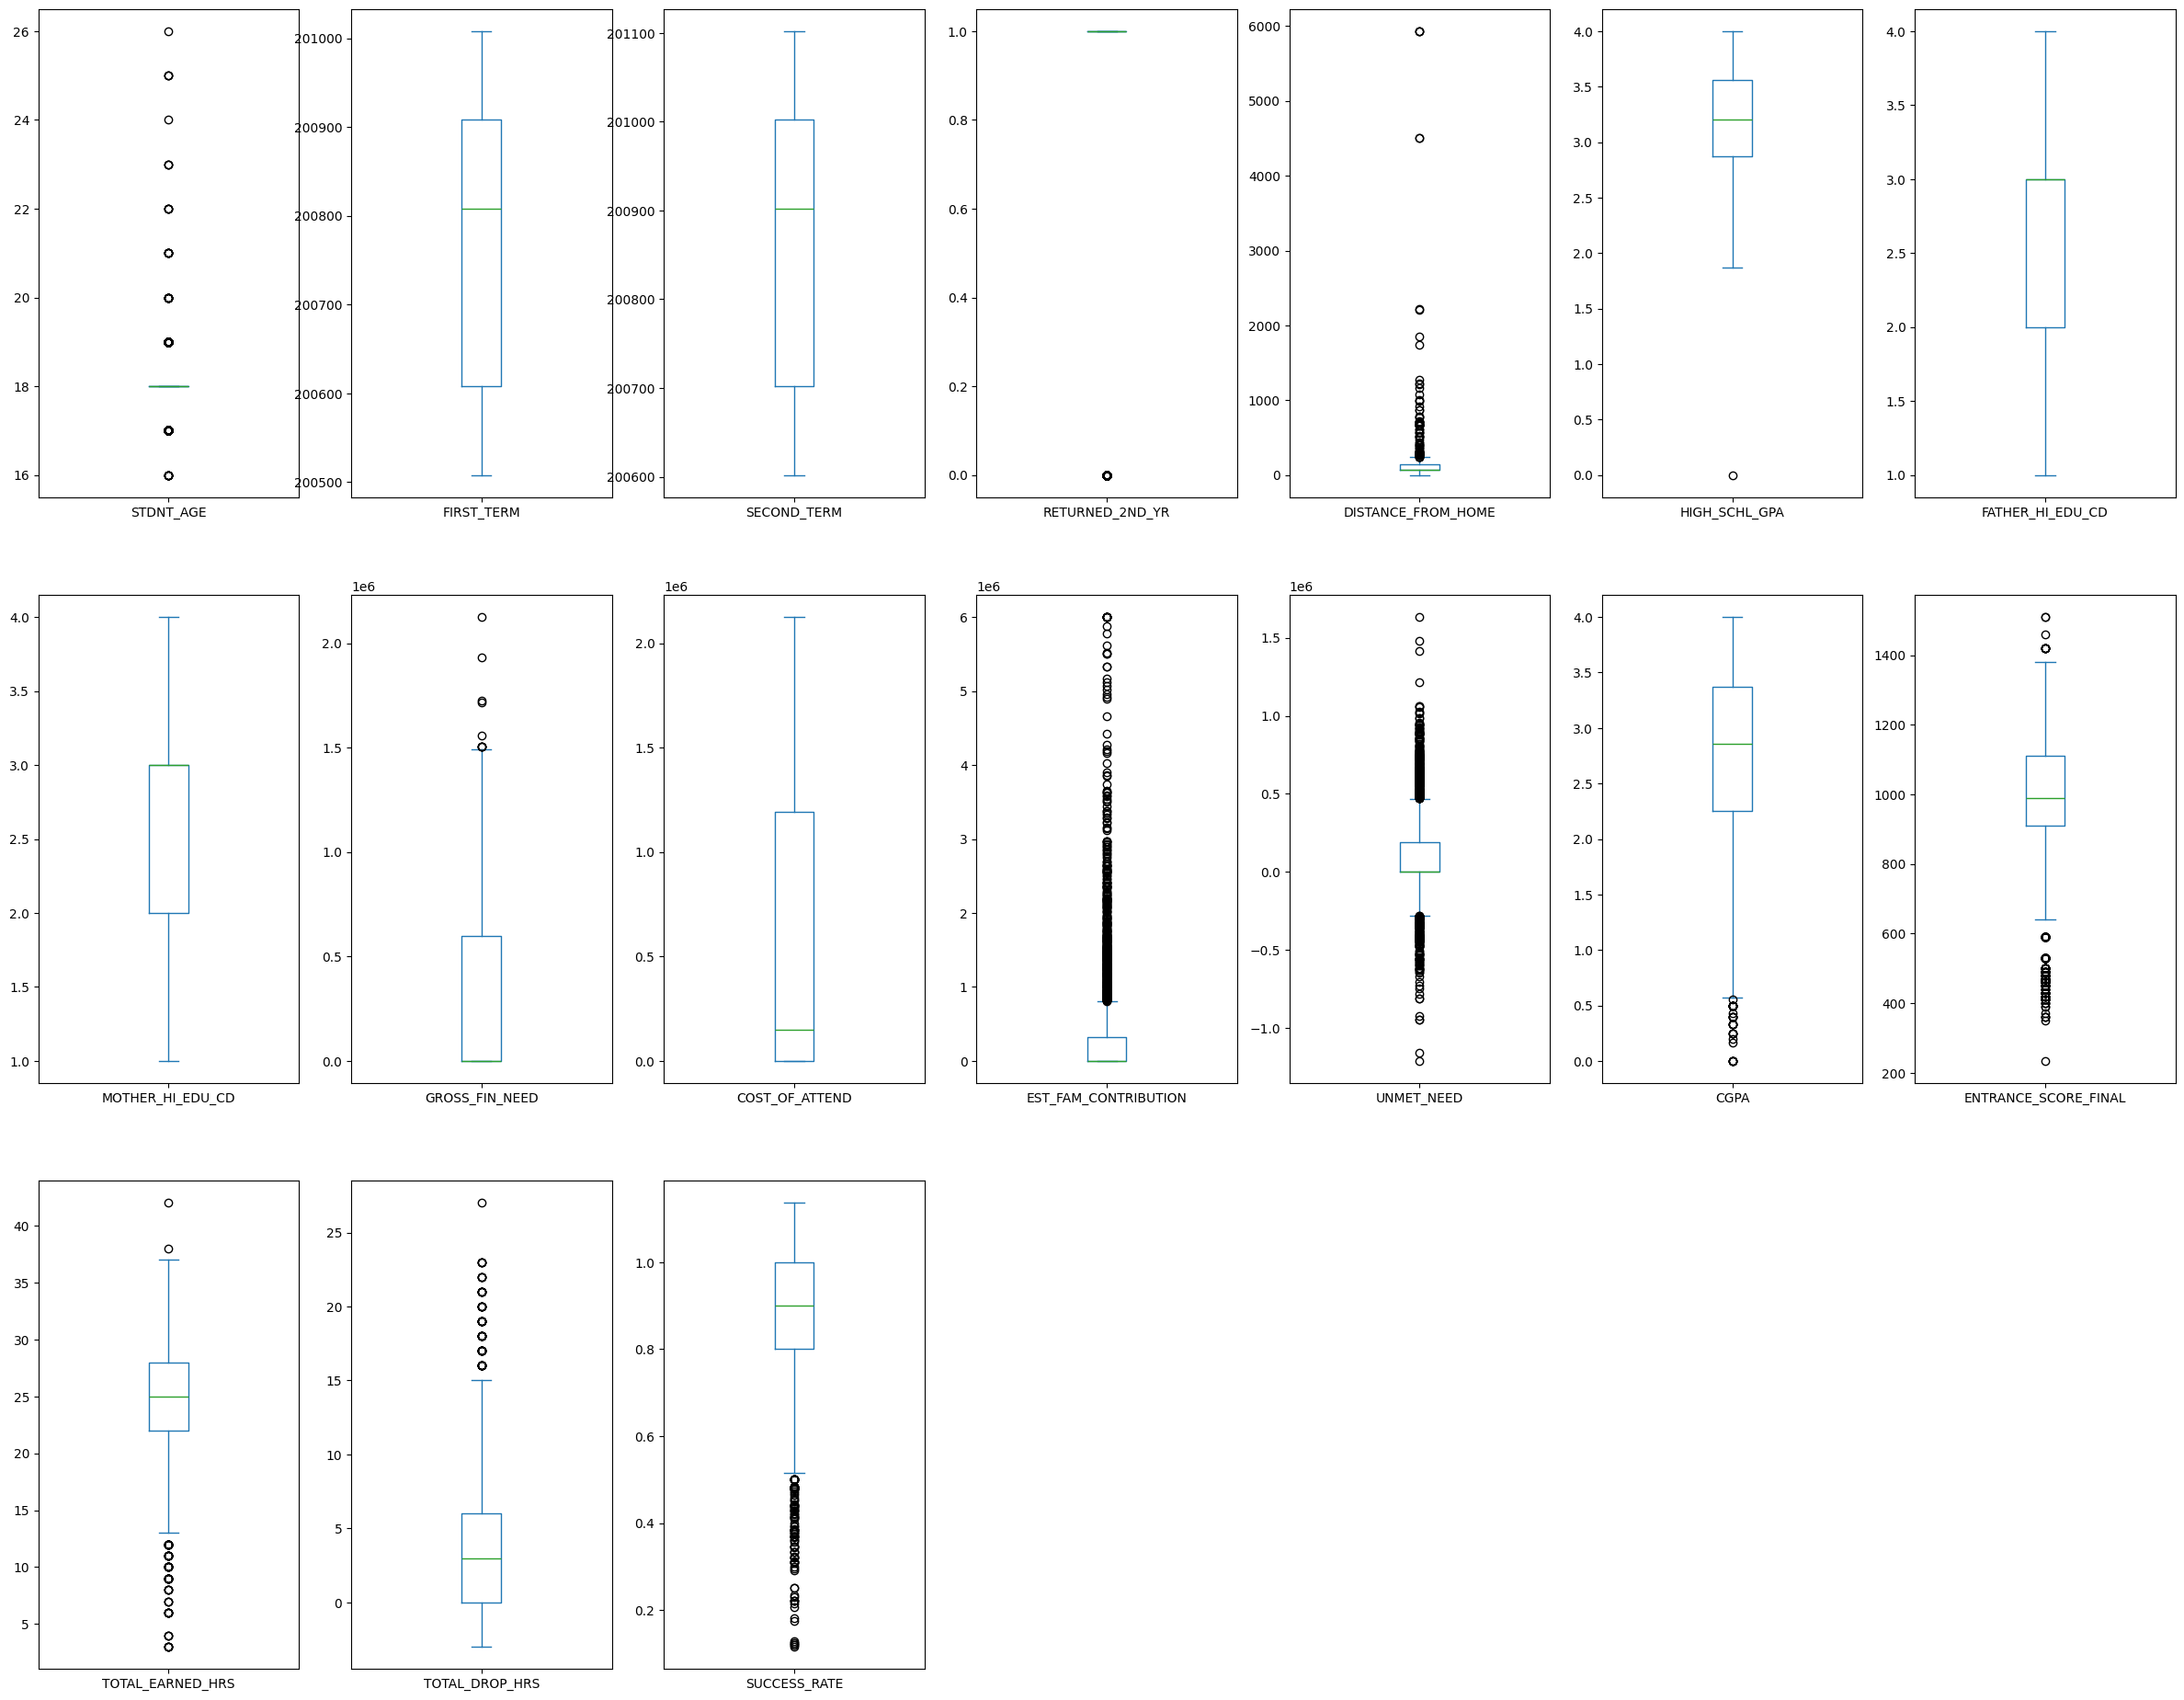

In [170]:
# checking for outliers

df[numerical].plot(kind='box', subplots=True, layout=(5,7), figsize=(30,40))
plt.show()

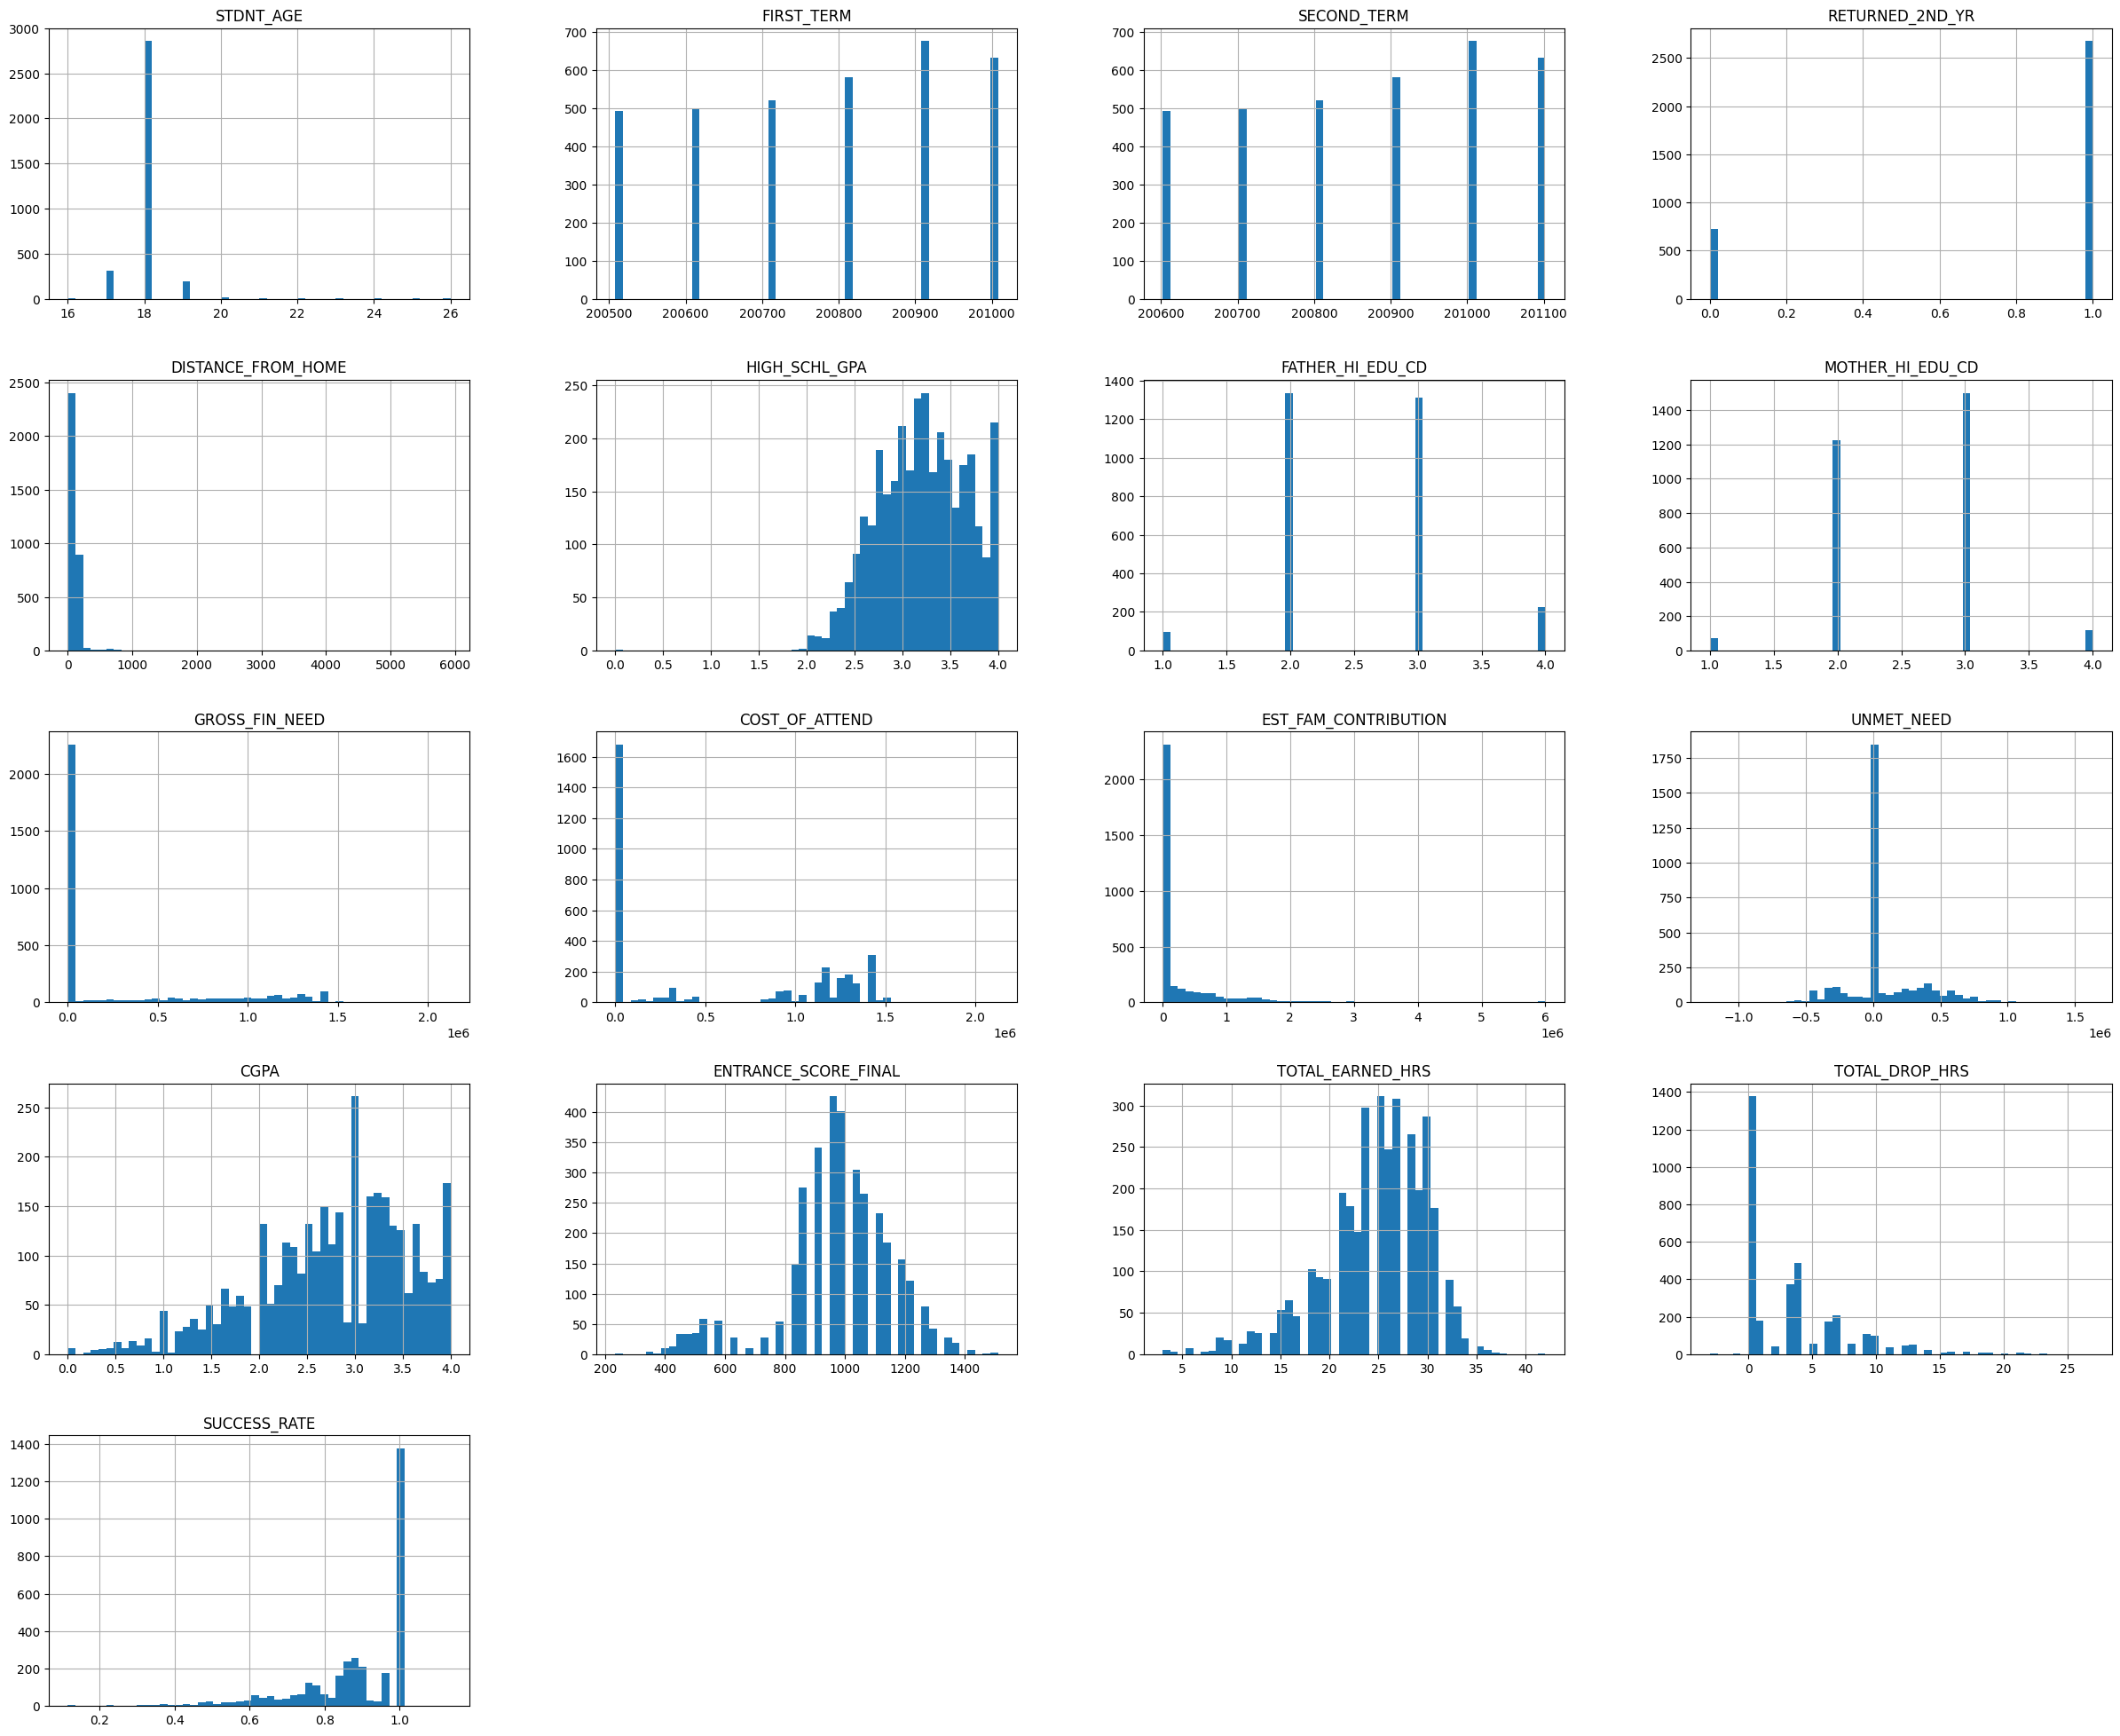

In [171]:
# plotting the distribution of variables

df[numerical].hist(bins=50, layout=(8,4), figsize=(30,40))
plt.show()

In [172]:
df[numerical].isnull().sum().sort_values(ascending=False)

MOTHER_HI_EDU_CD        489
FATHER_HI_EDU_CD        432
HIGH_SCHL_GPA            53
DISTANCE_FROM_HOME       25
STDNT_AGE                 0
UNMET_NEED                0
TOTAL_DROP_HRS            0
TOTAL_EARNED_HRS          0
ENTRANCE_SCORE_FINAL      0
CGPA                      0
GROSS_FIN_NEED            0
EST_FAM_CONTRIBUTION      0
COST_OF_ATTEND            0
FIRST_TERM                0
RETURNED_2ND_YR           0
SECOND_TERM               0
SUCCESS_RATE              0
dtype: int64

In [173]:
# impute missing values in numericalـ_null_cols respective column median in X_train

for col in numerical:
    col_median = df[col].median()
    df[col].fillna(col_median, inplace=True)


/var/folders/b1/pp17fpp91zz9m_r7bqr47r940000gn/T/ipykernel_67718/156838840.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(col_median, inplace=True)
/var/folders/b1/pp17fpp91zz9m_r7bqr47r940000gn/T/ipykernel_67718/156838840.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [174]:
df[numerical].isnull().sum().sort_values(ascending=False)

STDNT_AGE               0
COST_OF_ATTEND          0
TOTAL_DROP_HRS          0
TOTAL_EARNED_HRS        0
ENTRANCE_SCORE_FINAL    0
CGPA                    0
UNMET_NEED              0
EST_FAM_CONTRIBUTION    0
GROSS_FIN_NEED          0
FIRST_TERM              0
MOTHER_HI_EDU_CD        0
FATHER_HI_EDU_CD        0
HIGH_SCHL_GPA           0
DISTANCE_FROM_HOME      0
RETURNED_2ND_YR         0
SECOND_TERM             0
SUCCESS_RATE            0
dtype: int64

### Engineering missing values in categorical variables

In [175]:
# print percentage of missing values in the categorical variables 

df[categorical].isnull().sum().sort_values(ascending=False)

STDNT_GENDER         0
STDNT_BACKGROUND     0
IN_STATE_FLAG        0
INTERNATIONAL_STS    0
STDNT_MAJOR          0
STDNT_MINOR          0
HOUSING_STS          0
DEGREE_GROUP_CD      0
dtype: int64

In [176]:
# Explore unique labels in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')



STDNT_GENDER  contains  2  labels
STDNT_BACKGROUND  contains  8  labels
IN_STATE_FLAG  contains  2  labels
INTERNATIONAL_STS  contains  2  labels
STDNT_MAJOR  contains  9  labels
STDNT_MINOR  contains  2  labels
HOUSING_STS  contains  2  labels
DEGREE_GROUP_CD  contains  3  labels


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   STDNT_AGE             3400 non-null   int64  
 1   STDNT_GENDER          3400 non-null   object 
 2   STDNT_BACKGROUND      3400 non-null   object 
 3   IN_STATE_FLAG         3400 non-null   object 
 4   INTERNATIONAL_STS     3400 non-null   object 
 5   STDNT_MAJOR           3400 non-null   object 
 6   STDNT_MINOR           3400 non-null   object 
 7   FIRST_TERM            3400 non-null   int64  
 8   SECOND_TERM           3400 non-null   int64  
 9   HOUSING_STS           3400 non-null   object 
 10  RETURNED_2ND_YR       3400 non-null   int64  
 11  DISTANCE_FROM_HOME    3400 non-null   float64
 12  HIGH_SCHL_GPA         3400 non-null   float64
 13  FATHER_HI_EDU_CD      3400 non-null   float64
 14  MOTHER_HI_EDU_CD      3400 non-null   float64
 15  DEGREE_GROUP_CD      

In [178]:
df1= df

In [179]:
from sklearn import preprocessing

In [180]:
# Explore unique labels in categorical variables
label_encoder = preprocessing.LabelEncoder()
for var in categorical:
    df1[var] = label_encoder.fit_transform(df1[var])



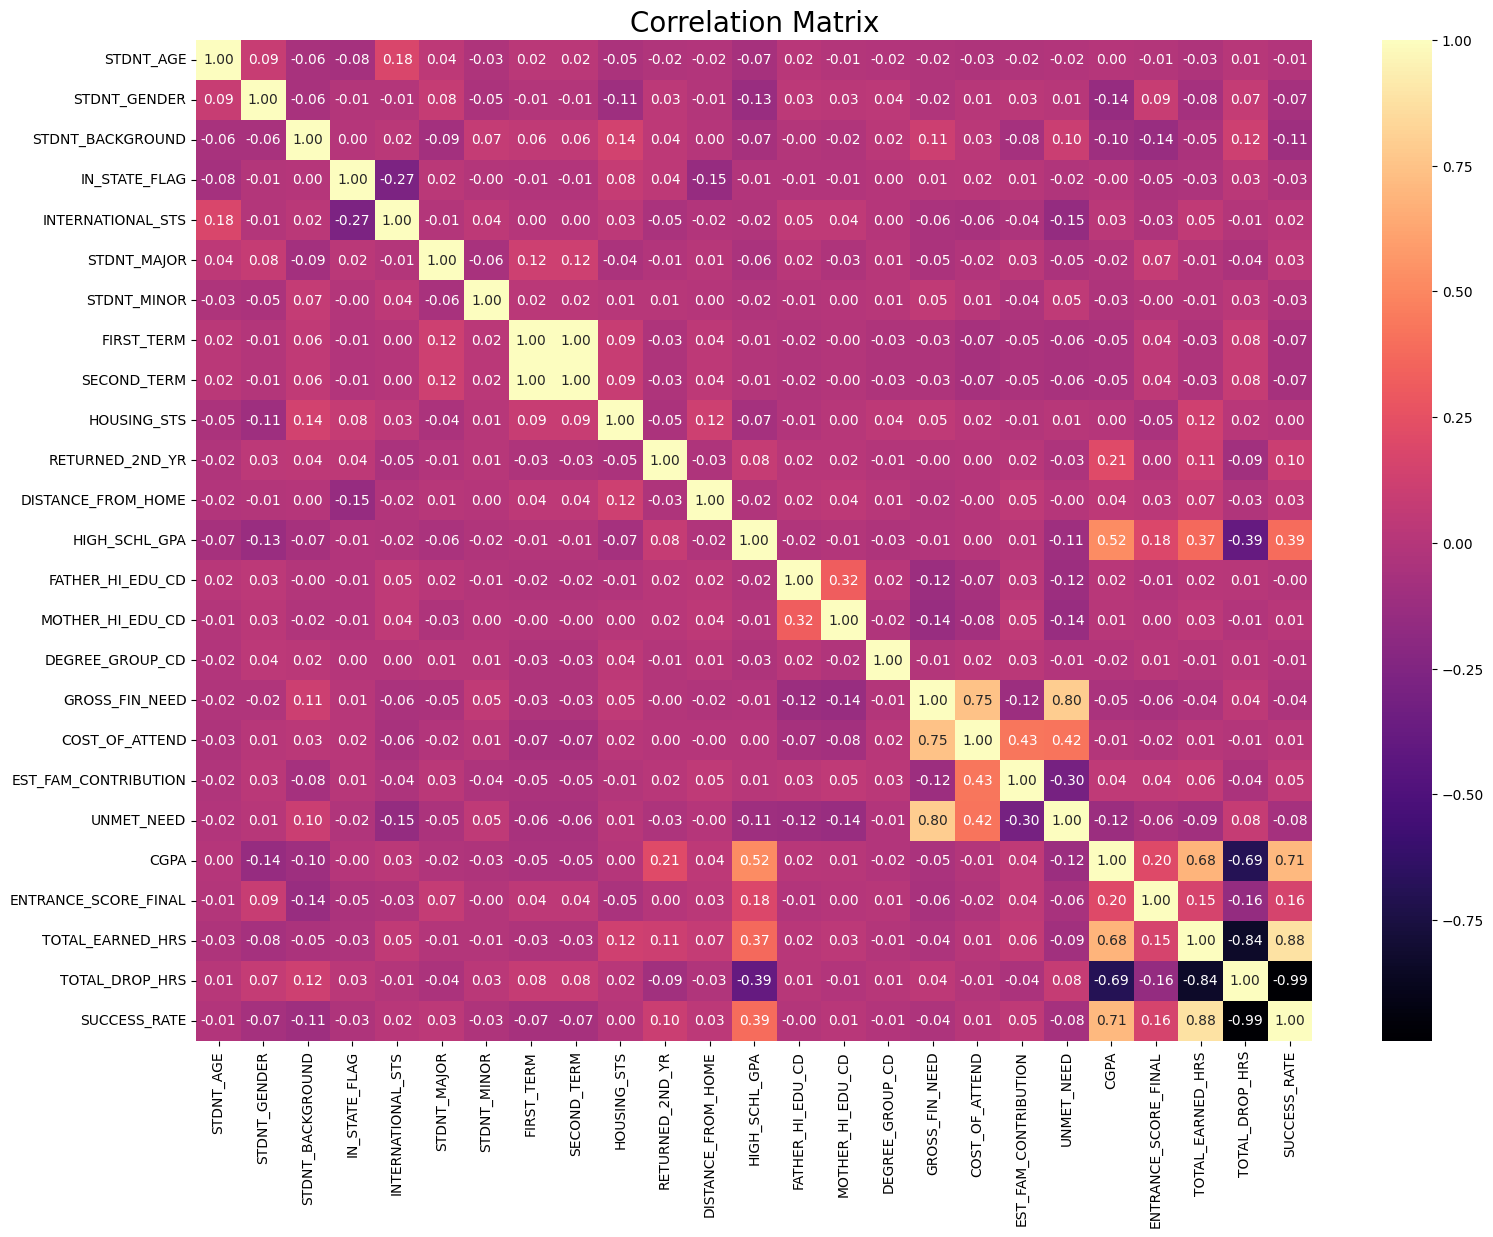

In [181]:
# Correlation matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [182]:
# finding the most important features
corr_target = df1.corr()['RETURNED_2ND_YR'].sort_values(ascending=False)
important_features = corr_target[1:11].index.to_list()
important_features, corr_target

(['CGPA',
  'TOTAL_EARNED_HRS',
  'SUCCESS_RATE',
  'HIGH_SCHL_GPA',
  'IN_STATE_FLAG',
  'STDNT_BACKGROUND',
  'STDNT_GENDER',
  'EST_FAM_CONTRIBUTION',
  'FATHER_HI_EDU_CD',
  'MOTHER_HI_EDU_CD'],
 RETURNED_2ND_YR         1.000000
 CGPA                    0.211780
 TOTAL_EARNED_HRS        0.108029
 SUCCESS_RATE            0.100601
 HIGH_SCHL_GPA           0.079935
 IN_STATE_FLAG           0.041706
 STDNT_BACKGROUND        0.041555
 STDNT_GENDER            0.029670
 EST_FAM_CONTRIBUTION    0.019428
 FATHER_HI_EDU_CD        0.017291
 MOTHER_HI_EDU_CD        0.016714
 STDNT_MINOR             0.008518
 COST_OF_ATTEND          0.002144
 ENTRANCE_SCORE_FINAL    0.001032
 GROSS_FIN_NEED         -0.004128
 DEGREE_GROUP_CD        -0.007351
 STDNT_MAJOR            -0.013703
 STDNT_AGE              -0.019863
 DISTANCE_FROM_HOME     -0.026656
 SECOND_TERM            -0.031771
 FIRST_TERM             -0.031771
 UNMET_NEED             -0.034319
 HOUSING_STS            -0.047015
 INTERNATIONAL_STS 

In [183]:
# split X and y into training and testing sets

x = df1[important_features]
y = df1['RETURNED_2ND_YR']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=True)


In [184]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2720, 10), (680, 10))

In [185]:
X_train.describe()

,CGPA,TOTAL_EARNED_HRS,SUCCESS_RATE,HIGH_SCHL_GPA,IN_STATE_FLAG,STDNT_BACKGROUND,STDNT_GENDER,EST_FAM_CONTRIBUTION,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD
count,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2.720000e+03,2720.000000,2720.000000
mean,2.761983,24.755882,0.873734,3.199923,0.905147,0.894853,0.369118,3.411129e+05,2.613971,2.631250
std,0.815180,5.246197,0.155556,0.454293,0.293066,1.296433,0.482655,7.870543e+05,0.652792,0.585199
min,0.000000,3.000000,0.115385,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000
25%,2.250000,22.000000,0.800000,2.870000,1.000000,0.000000,0.000000,0.000000e+00,2.000000,2.000000
50%,2.857143,25.000000,0.900000,3.200000,1.000000,0.000000,0.000000,0.000000e+00,3.000000,3.000000
75%,3.375000,28.250000,1.000000,3.550000,1.000000,2.000000,1.000000,3.135600e+05,3.000000,3.000000
max,4.000000,42.000000,1.136364,4.000000,1.000000,7.000000,1.000000,5.999940e+06,4.000000,4.000000


In [186]:
# feature scaling
cols = X_train.columns

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,CGPA,TOTAL_EARNED_HRS,SUCCESS_RATE,HIGH_SCHL_GPA,IN_STATE_FLAG,STDNT_BACKGROUND,STDNT_GENDER,EST_FAM_CONTRIBUTION,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD
count,2.720000e+03,2.720000e+03,2.720000e+03,2.720000e+03,2.720000e+03,2.720000e+03,2.720000e+03,2.720000e+03,2.720000e+03,2.720000e+03
mean,-8.359326e-17,-3.343731e-16,7.327472e-16,-4.231909e-16,2.220446e-17,-3.918434e-18,-3.134747e-17,9.796086e-19,3.108624e-16,-1.541251e-16
std,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00
min,-3.388810e+00,-4.147744e+00,-4.875989e+00,-7.045029e+00,-3.089116e+00,-6.903693e-01,-7.649063e-01,-4.334842e-01,-2.472865e+00,-2.788025e+00
25%,-6.281767e-01,-5.254071e-01,-4.740909e-01,-7.263659e-01,3.237172e-01,-6.903693e-01,-7.649063e-01,-4.334842e-01,-9.407025e-01,-1.078891e+00
50%,1.167561e-01,4.654086e-02,1.688830e-01,1.703831e-04,3.237172e-01,-6.903693e-01,-7.649063e-01,-4.334842e-01,5.914597e-01,6.302431e-01
75%,7.521399e-01,6.661511e-01,8.118570e-01,7.707391e-01,3.237172e-01,8.526089e-01,1.307350e+00,-3.501404e-02,5.914597e-01,6.302431e-01
max,1.518982e+00,3.287579e+00,1.688640e+00,1.761470e+00,3.237172e-01,4.710054e+00,1.307350e+00,7.191203e+00,2.123622e+00,2.339377e+00


In [192]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)
y_pred_train = svc.predict(X_train)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# F1-score
score_train_log_f1 = f1_score(y_train, y_pred_train)
score_test_log_f1 = f1_score(y_test, y_pred)

# Accuracy
score_train_log_acc1 = accuracy_score(y_train, y_pred_train)
score_test_log_acc1 = accuracy_score(y_test, y_pred)

print(f'Logistic Regression - Training F1-score: {score_train_log_f1*100:.3f}%')
print(f'Logistic Regression - Testing  F1-score: {score_test_log_f1*100:.3f}%')

print(f'Logistic Regression - Training Accuracy: {score_train_log_acc1*100:.3f}%')
print(f'Logistic Regression - Testing  Accuracy: {score_test_log_acc1*100:.3f}%')


Model accuracy score with default hyperparameters: 0.8118
Logistic Regression - Training F1-score: 88.288%
Logistic Regression - Testing  F1-score: 89.560%
Logistic Regression - Training Accuracy: 79.301%
Logistic Regression - Testing  Accuracy: 81.176%


In [191]:
# 1. Using Logistic Regression -- without considering the imbalanced data
log_clf = LogisticRegression(C=1.5)
log_clf.fit(X_train, y_train)

# Predict
y_pred_train_log = log_clf.predict(X_train)
y_pred_test_log = log_clf.predict(X_test)
# F1-score
score_train_log_f1 = f1_score(y_train, y_pred_train_log)
score_test_log_f1 = f1_score(y_test, y_pred_test_log)

# Accuracy
score_train_log_acc1 = accuracy_score(y_train, y_pred_train_log)
score_test_log_acc1 = accuracy_score(y_test, y_pred_test_log)

print(f'Logistic Regression - Training F1-score: {score_train_log_f1*100:.3f}%')
print(f'Logistic Regression - Testing  F1-score: {score_test_log_f1*100:.3f}%')

print(f'Logistic Regression - Training Accuracy: {score_train_log_acc1*100:.3f}%')
print(f'Logistic Regression - Testing  Accuracy: {score_test_log_acc1*100:.3f}%')


Logistic Regression - Training F1-score: 88.112%
Logistic Regression - Testing  F1-score: 89.655%
Logistic Regression - Training Accuracy: 79.007%
Logistic Regression - Testing  Accuracy: 81.471%
